# 🌳 **Ejercicio 4: Algoritmo de Árboles de Decisión**

##Francisco josse Rojas Rojas
##Yeira Liseth Rodriguez Rodriguez



## 📘 Documentación Detallada de Árboles de Decisión

### **1. ¿Qué son los Árboles de Decisión?**

Los árboles de decisión son modelos de **aprendizaje supervisado no paramétrico** usados tanto para:

- 📊 **Clasificación**: Predecir clases o etiquetas (discretas).
- 📈 **Regresión**: Predecir valores numéricos continuos.

Su estructura es similar a un **diagrama de flujo**, y está compuesta por:

- **Nodos internos**: pruebas sobre atributos (ej: `¿edad > 30?`)
- **Ramas**: resultado de la prueba (`Sí` / `No`)
- **Hojas**: clases finales o predicciones


### **2. ¿Cómo funciona un Árbol de Decisión?**

El árbol se construye de manera **recursiva**, dividiendo el espacio de datos según las características más informativas.

####Proceso de construcción:

1. **Nodo raíz**: contiene todo el conjunto de entrenamiento.
2. **Selección de la mejor división**:
   - En clasificación se usan métricas como:
     - **Entropía** y **Ganancia de Información**
     - **Impureza de Gini**
   - En regresión se usan:
     - **Varianza** o **Error cuadrático medio (MSE)**

####Fórmulas de impureza

##### Entropía:
$$
Entropy(S) = -\sum p_i \cdot \log_2(p_i)
$$

##### Gini:
$$
Gini(S) = 1 - \sum p_i^2
$$

3. **División del nodo (split)**:
   - Se selecciona la condición que mejor separa las clases
   - Ejemplo: `¿ph del suelo ≤ 7.5? → Rama izquierda / derecha`

4. **Criterios de parada**:
   - Todos los datos en el nodo son de una sola clase
   - Profundidad máxima (`max_depth`) alcanzada
   - Número mínimo de muestras (`min_samples_split`)
   - La mejora en pureza es despreciable

5. **Poda (Pruning)**:
   - Elimina ramas poco significativas para evitar *overfitting*
   - Puede hacerse de forma preventiva o posterior al entrenamiento



### **3. Ventajas y Desventajas**

| ✅ **Ventajas**                                      | ❌ **Desventajas**                                       |
|-----------------------------------------------------|----------------------------------------------------------|
| 🌳 Fácil de **interpretar y visualizar**             | 🌪️ Propenso al **sobreajuste** (overfitting)             |
| 🧩 Maneja datos **categóricos y numéricos**          | 🔀 Alta **varianza**: árboles cambian mucho con nuevos datos |
| ⚡ **Rápido en predicción**                          | 🎯 Divisiones locales: **no garantizan el óptimo global** |
| 📌 Permite **medir la importancia de las variables** | 🌲 Puede requerir poda o ensamblado (Random Forest, etc.) |



### **4. Aplicaciones Comunes**

- 🏦 **Evaluación de riesgo crediticio**
- 🩺 **Soporte al diagnóstico médico**
- 🛒 **Clasificación de productos o recomendaciones**
- 📊 **Segmentación de clientes en marketing**
- 🌱 **Clasificación de especies en agricultura o botánica**



### **5. Algunas Aplicaciones sencillas a continuación**


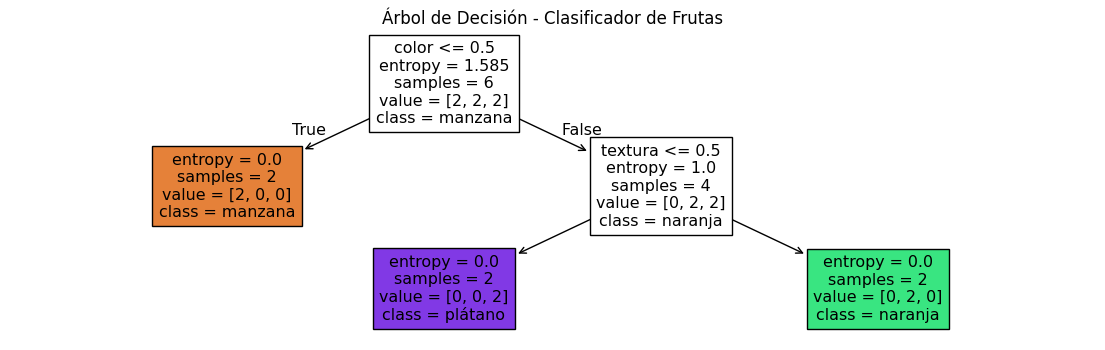

🍌 Predicción para fruta nueva: plátano


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [7]:
#FRANCISCO JOSSE ROJAS ROJAS
#YEIRA LISETH RODRIGUEZ RODRIGUEZ

# Clasificación de frutas usando árboles de decisión

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 1. Dataset sencillo
data = pd.DataFrame({
    "color": [0, 1, 1, 0, 2, 2],    # 0=verde, 1=anaranjado, 2=amarillo
    "peso": [150, 180, 170, 145, 120, 110],
    "textura": [0, 1, 1, 0, 0, 0],  # 0=lisa, 1=áspera
    "fruta": ["manzana", "naranja", "naranja", "manzana", "plátano", "plátano"]
})

# Variables y etiquetas
X = data[["color", "peso", "textura"]]
y = data["fruta"]

# 2. Entrenar el modelo
modelo = DecisionTreeClassifier(criterion="entropy", max_depth=3)
modelo.fit(X, y)

# 3. Visualizar árbol
plt.figure(figsize=(14, 4))
plot_tree(modelo, feature_names=["color", "peso", "textura"],
          class_names=modelo.classes_, filled=True)
plt.title("Árbol de Decisión - Clasificador de Frutas")
plt.show()

# 4. Probar con una fruta nueva - - - - - - - - - - - - - - - - - - - - - - - - -
# Ejemplo: color amarillo (2), peso 115, textura lisa (0)
fruta_nueva = [[2, 115, 0]]
prediccion = modelo.predict(fruta_nueva)
print(f"🍌 Predicción para fruta nueva: {prediccion[0]}")

# 🌱 Clasificación de plantas según el tipo de suelo

Este ejemplo muestra cómo un árbol de decisión puede ser usado para **determinar qué tipo de planta crecerá mejor** en una zona determinada, en función de variables relacionadas con el suelo y el entorno.



##Variables consideradas:

- **pH del suelo**: acidez o alcalinidad (escala 0 a 14).
- **Humedad del suelo**: porcentaje de humedad retenida.
- **Nivel de luz**: cuánta exposición solar hay (1=baja, 2=media, 3=alta).
- **Tipo de planta** (etiqueta): césped, cactus o helecho.



##Objetivo

Dado un conjunto de características del suelo, el árbol de decisión podrá **clasificar automáticamente** qué planta es la más adecuada para crecer ahí, con base en ejemplos aprendidos.

Esto ilustra cómo los árboles de decisión pueden ser útiles en la agricultura, la jardinería o el diseño de espacios verdes urbanos, ayudando a seleccionar la vegetación más apta para un entorno.


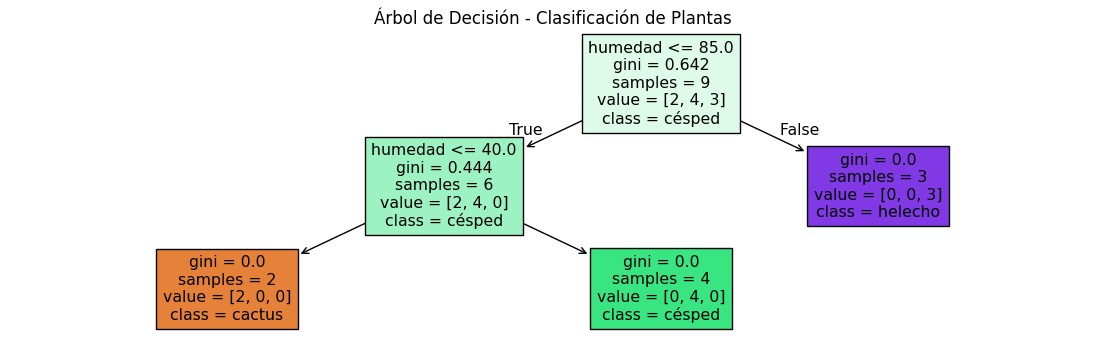

🌿 La planta recomendada para esta zona es: césped


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [5]:
# Clasificación de plantas según características del suelo

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Dataset simplificado
suelo = pd.DataFrame({
    "ph": [6.5, 7.0, 5.5, 8.0, 4.5, 7.2, 6.8, 3.5, 7.8],
    "humedad": [80, 60, 90, 20, 95, 55, 50, 98, 30],
    "luz": [2, 3, 1, 3, 1, 2, 2, 1, 3],
    "planta": ["césped", "césped", "helecho", "cactus", "helecho", "césped", "césped", "helecho", "cactus"]
})

# Entrenamiento
X = suelo[["ph", "humedad", "luz"]]
y = suelo["planta"]

modelo = DecisionTreeClassifier(criterion="gini", max_depth=3)
modelo.fit(X, y)

# Visualizar árbol
plt.figure(figsize=(14,4))
plot_tree(modelo, feature_names=["ph", "humedad", "luz"],
          class_names=modelo.classes_, filled=True)
plt.title("Árbol de Decisión - Clasificación de Plantas")
plt.show()

# Predicción para una nueva zona -- - - - - - - - - - - - - - - - - - - - - - - -
# pH = 6.7, humedad = 85%, luz = 2 (media)
zona_nueva = [[6.7, 85, 2]]
prediccion = modelo.predict(zona_nueva)
print(f"🌿 La planta recomendada para esta zona es: {prediccion[0]}")